In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests 
import datetime as dt
plt.style.use('classic')

In [2]:
def get_data(coin, currency, trailing):
  url = f"https://min-api.cryptocompare.com/data/v2/histoday?fsym={coin}&tsym={currency}&limit={trailing}"
  data = requests.get(url).json()['Data']['Data']

  df = pd.DataFrame(data)

  df['datetime'] = pd.to_datetime(df['time'], unit='s')
  df.set_index('datetime', inplace=True)

  return df

In [3]:
coin = 'BTC'
currency = 'USDT'
coin_df = get_data(coin, currency, 1250)
coin_df.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
datetime,,,,,,,,,
2017-11-04,1509753600,7479.68,6902.89,7115.61,1413.75,10170448.40,7357.39,direct,
2017-11-05,1509840000,7589.89,7280.06,7357.39,1217.95,9075373.36,7345.80,direct,
2017-11-06,1509926400,7401.10,6906.50,7345.80,1780.07,12795925.90,6960.06,direct,
2017-11-07,1510012800,7198.10,6902.93,6960.08,1453.54,10267254.05,7063.44,direct,
2017-11-08,1510099200,7768.03,6658.35,7063.40,2814.44,20441142.29,7304.13,direct,


In [4]:
coin_df['5ma'] = coin_df['close'].rolling(window=5, min_periods=0).mean()
coin_df['20ma'] = coin_df['close'].rolling(window=20, min_periods=0).mean()
coin_df['60ma'] = coin_df['close'].rolling(window=60, min_periods=0).mean()


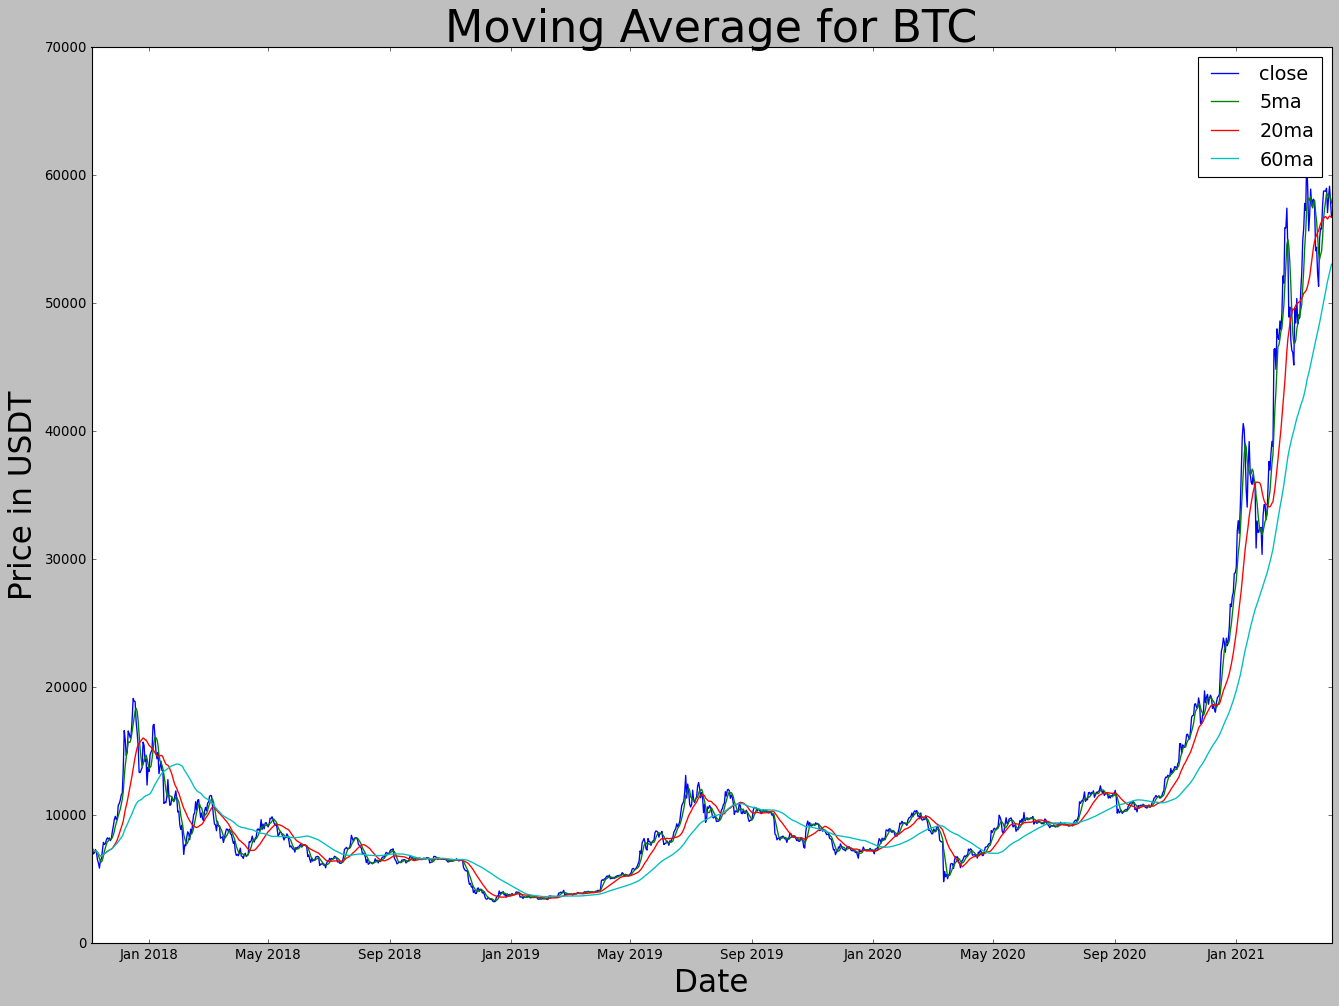

In [5]:
plt.figure(figsize=(20,14))
plt.title(f'Moving Average for {coin}', fontsize=40)
plt.xlabel('Date', fontsize=28)
plt.ylabel(f'Price in {currency}', fontsize=28)
handles = ['close', '5ma', '20ma', '60ma']
plt.plot(coin_df[['close', '5ma', '20ma', '60ma']], linewidth=1.2)
plt.legend(labels=handles, fontsize='x-large')

In [6]:
""" SML MA Singal Function """
def trading_signal(data):

  buy_signal = []
  sell_signal = []
  sell_flag = False
  buy_flag = False

  for i in range(0, len(data)):
    if data['20ma'][i] < data['60ma'][i] and data['5ma'][i] < data['20ma'][i] and buy_flag == False and sell_flag == False:
      buy_signal.append(data['close'][i])
      sell_signal.append(np.nan)
      buy_flag = True
    elif buy_flag == True and data['5ma'][i] > data['20ma'][i]:
      sell_signal.append(data['close'][i])
      buy_signal.append(np.nan)
      buy_flag = False

    elif data['20ma'][i] > data['60ma'][i] and data['5ma'][i] > data['20ma'][i] and buy_flag == False and sell_flag == False:
      buy_signal.append(data['close'][i])
      sell_signal.append(np.nan)
      sell_flag = True
    elif sell_flag == True and data['5ma'][i] < data['20ma'][i]:
      sell_signal.append(data['close'][i])
      buy_signal.append(np.nan)
      sell_flag = False

    else:
      buy_signal.append(np.nan)
      sell_signal.append(np.nan)

  return buy_signal, sell_signal

In [7]:
coin_df['Buy'] = trading_signal(coin_df)[0]
coin_df['Sell'] = trading_signal(coin_df)[1]
coin_df.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,5ma,20ma,60ma,Buy,Sell
datetime,,,,,,,,,,,,,,
2017-11-04,1509753600,7479.68,6902.89,7115.61,1413.75,10170448.40,7357.39,direct,,7357.390000,7357.390000,7357.390000,NaN,NaN
2017-11-05,1509840000,7589.89,7280.06,7357.39,1217.95,9075373.36,7345.80,direct,,7351.595000,7351.595000,7351.595000,NaN,NaN
2017-11-06,1509926400,7401.10,6906.50,7345.80,1780.07,12795925.90,6960.06,direct,,7221.083333,7221.083333,7221.083333,NaN,NaN
2017-11-07,1510012800,7198.10,6902.93,6960.08,1453.54,10267254.05,7063.44,direct,,7181.672500,7181.672500,7181.672500,NaN,NaN
2017-11-08,1510099200,7768.03,6658.35,7063.40,2814.44,20441142.29,7304.13,direct,,7206.164000,7206.164000,7206.164000,NaN,NaN


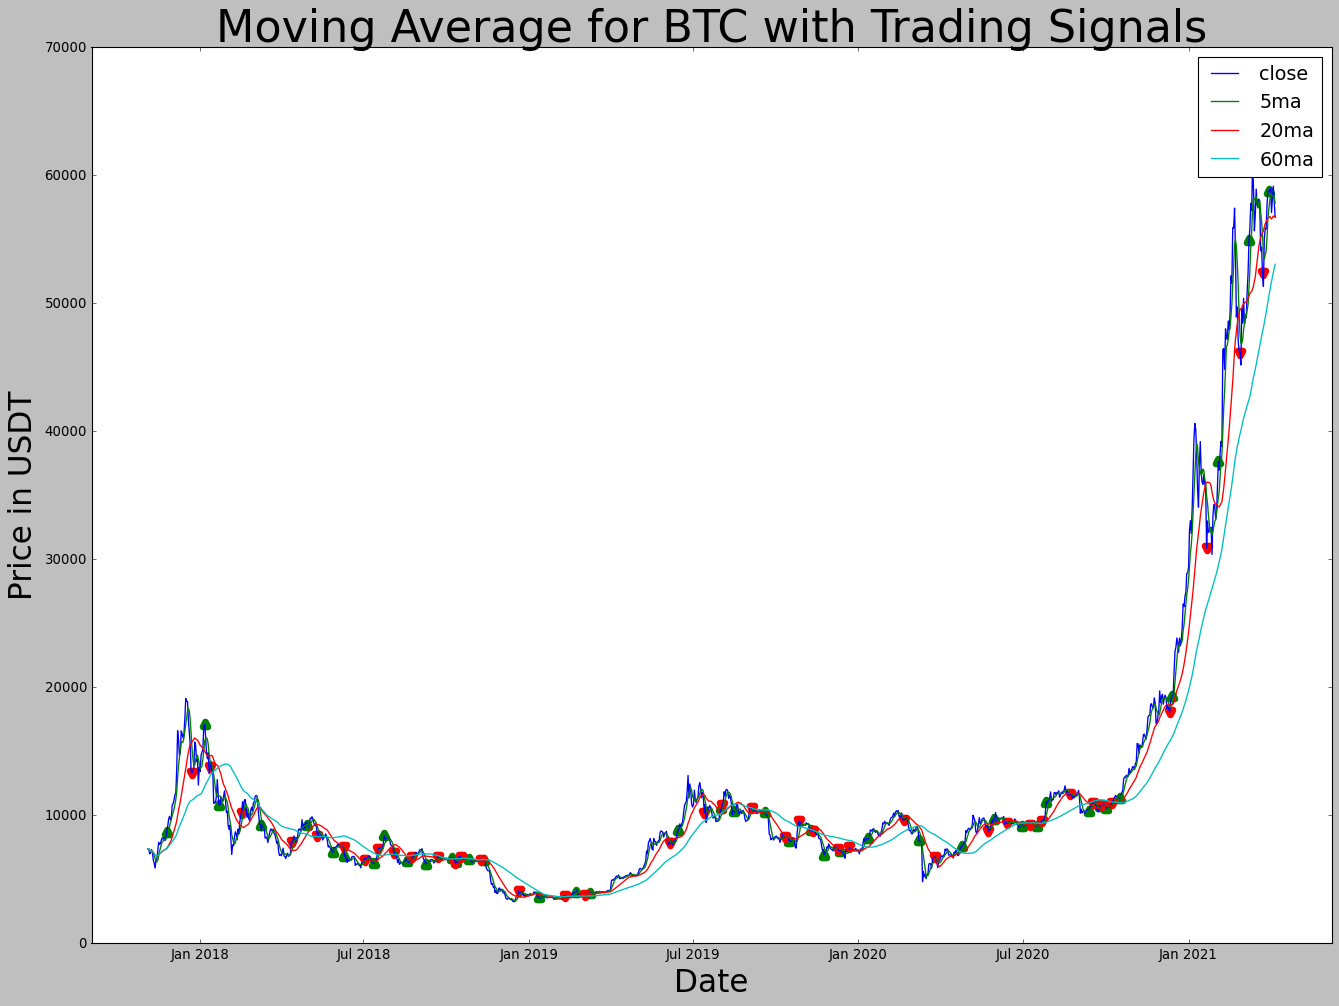

In [8]:
plt.figure(figsize=(20,14))
plt.title(f'Moving Average for {coin} with Trading Signals', fontsize=40)
plt.xlabel('Date', fontsize=28)
plt.ylabel(f'Price in {currency}', fontsize=28)
handles = ['close', '5ma', '20ma', '60ma']
plt.plot(coin_df[['close', '5ma', '20ma', '60ma']], linewidth=1.2)
plt.scatter(coin_df.index, coin_df['Buy'], color='g', marker='^', alpha=1, linewidth=6)
plt.scatter(coin_df.index, coin_df['Sell'], color='r', marker='v', alpha=1, linewidth=6)
plt.legend(labels=handles, fontsize='x-large')

In [9]:
""" Trade_dates is the x-axis for volume comparison """
trade_dates = coin_df.loc[coin_df['Buy'] > 0]
trade_dates.index

DatetimeIndex(['2017-11-25', '2018-01-06', '2018-01-22', '2018-03-09',
               '2018-04-30', '2018-05-28', '2018-06-10', '2018-07-13',
               '2018-07-24', '2018-08-18', '2018-09-08', '2018-10-07',
               '2018-10-12', '2018-10-26', '2018-11-12', '2019-01-12',
               '2019-02-22', '2019-03-09', '2019-06-15', '2019-08-02',
               '2019-08-16', '2019-09-19', '2019-10-16', '2019-11-09',
               '2019-11-24', '2019-12-12', '2020-01-12', '2020-03-08',
               '2020-04-25', '2020-05-30', '2020-06-30', '2020-07-17',
               '2020-07-27', '2020-09-13', '2020-09-25', '2020-10-02',
               '2020-10-17', '2020-12-14', '2021-02-03', '2021-03-09',
               '2021-03-31'],
              dtype='datetime64[ns]', name='datetime', freq=None)

In [10]:
def get_exchange_data(exchange, currency, limit):
  url = f'https://min-api.cryptocompare.com/data/exchange/symbol/histoday?fsym=BTC&tsym={currency}&limit={limit}&e={exchange}'

  data = requests.get(url).json()['Data']

  df = pd.DataFrame(data)

  df['datetime'] = pd.to_datetime(df['time'], unit='s')
  df.set_index('datetime', inplace=True)

  return df

In [11]:
dates = ['2017-11-25', '2018-01-06', '2018-01-22', '2018-03-09',
               '2018-04-30', '2018-05-28', '2018-06-10', '2018-07-13',
               '2018-07-24', '2018-08-18', '2018-09-08', '2018-10-07',
               '2018-10-12', '2018-10-26', '2018-11-12', '2019-01-12',
               '2019-02-22', '2019-03-09', '2019-06-15', '2019-08-02',
               '2019-08-16', '2019-09-19', '2019-10-16', '2019-11-09',
               '2019-11-24', '2019-12-12', '2020-01-12', '2020-03-08',
               '2020-04-25', '2020-05-30', '2020-06-30', '2020-07-17',
               '2020-07-27', '2020-09-13', '2020-09-25', '2020-10-02',
               '2020-10-17', '2020-12-14', '2021-02-03', '2021-03-09',
               '2021-03-31']

In [13]:
coinbase_df = get_exchange_data('Coinbase', 'USDT', 1250)['volumeto'][dates]
Binance_df = get_exchange_data('Binance', 'USDT', 1250)['volumeto'][dates]
Kraken_df = get_exchange_data('Kraken', 'USDT', 1250)['volumeto'][dates]
Bitstamp_df = get_exchange_data('Bitstamp', 'USDT', 1250)['volumeto'][dates]
Gemini_df = get_exchange_data('Gemini', 'USDT', 1250)['volumeto'][dates]
Bitfinex_df = get_exchange_data('Bitfinex', 'USDT', 1250)['volumeto'][dates]

In [14]:
df_total = pd.concat([coinbase_df,Binance_df,Kraken_df, Bitstamp_df, Gemini_df, Bitfinex_df],axis=1,sort=False)

df_total.columns = ['Coinbase','Binance','Kraken', 'Bitstamp', 'Gemini', 'Bitfinex']

df_total

,Coinbase,Binance,Kraken,Bitstamp,Gemini,Bitfinex
datetime,,,,,,
2017-11-25,3.547494e+07,2.989006e+08,4.745243e+07,3269467.52,8597098.76,1.915601e+08
2018-01-06,6.223396e+07,3.921086e+09,1.355084e+08,55159764.44,6287058.15,3.606412e+08
2018-01-22,2.236680e+07,1.500485e+09,9.380162e+07,17638762.43,1981581.23,1.857676e+08
2018-03-09,2.117630e+07,5.738763e+08,3.207178e+07,13594336.83,904480.53,1.072874e+08
2018-04-30,1.012747e+07,2.153823e+09,2.800213e+07,4832103.42,8413284.84,1.178800e+08
2018-05-28,1.334762e+07,7.485248e+08,1.356990e+07,6197616.75,3632752.75,8.499548e+07
2018-06-10,1.662332e+07,7.503625e+08,1.699797e+07,6110318.01,940465.17,8.630445e+07
2018-07-13,2.158398e+06,4.691380e+08,5.654996e+06,1148761.36,355244.70,1.989296e+07
2018-07-24,1.043106e+07,6.630570e+08,1.732698e+07,13263981.03,1840482.87,6.375011e+07


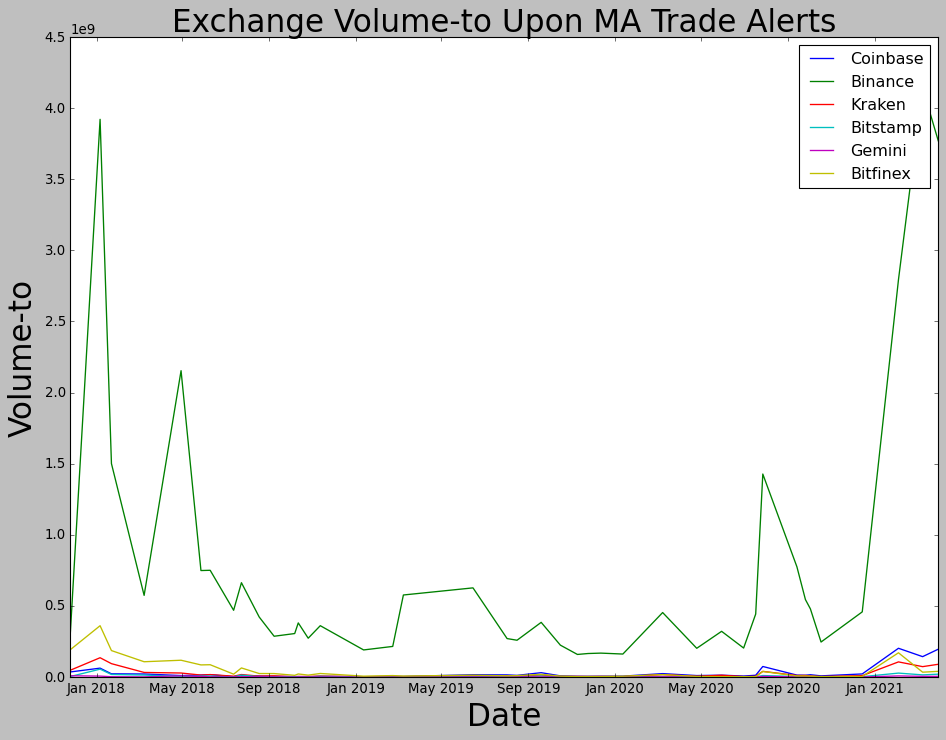

In [15]:
handles = ['Coinbase','Binance','Kraken', 'Bitstamp', 'Gemini', 'Bitfinex']

plt.figure(figsize=(14,10))
plt.title(f'Exchange Volume-to Upon MA Trade Alerts', fontsize=28)
plt.xlabel('Date', fontsize=28)
plt.ylabel(f'Volume-to', fontsize=28)
handles = ['Coinbase', 'Binance', 'Kraken', 'Bitstamp', 'Gemini', 'Bitfinex']
plt.plot(df_total, linewidth=1.2)
plt.legend(labels=handles, fontsize='large')

In [16]:
""" Same graph without Binance """
df_no_binance = df_total.drop(columns=['Binance'])
df_no_binance

,Coinbase,Kraken,Bitstamp,Gemini,Bitfinex
datetime,,,,,
2017-11-25,3.547494e+07,4.745243e+07,3269467.52,8597098.76,1.915601e+08
2018-01-06,6.223396e+07,1.355084e+08,55159764.44,6287058.15,3.606412e+08
2018-01-22,2.236680e+07,9.380162e+07,17638762.43,1981581.23,1.857676e+08
2018-03-09,2.117630e+07,3.207178e+07,13594336.83,904480.53,1.072874e+08
2018-04-30,1.012747e+07,2.800213e+07,4832103.42,8413284.84,1.178800e+08
2018-05-28,1.334762e+07,1.356990e+07,6197616.75,3632752.75,8.499548e+07
2018-06-10,1.662332e+07,1.699797e+07,6110318.01,940465.17,8.630445e+07
2018-07-13,2.158398e+06,5.654996e+06,1148761.36,355244.70,1.989296e+07
2018-07-24,1.043106e+07,1.732698e+07,13263981.03,1840482.87,6.375011e+07


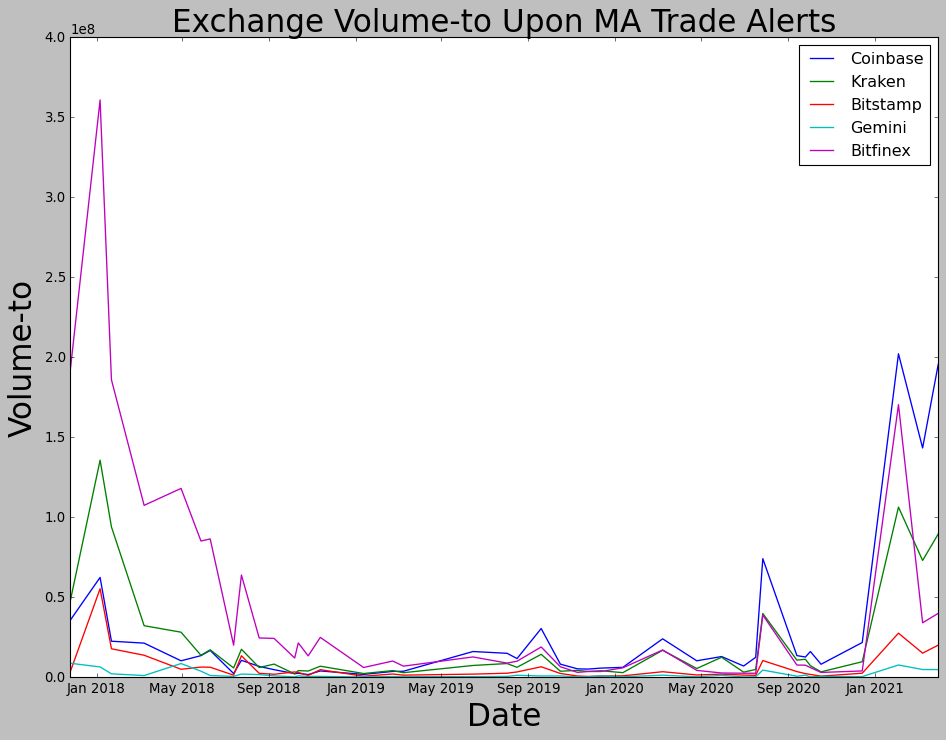

In [17]:
""" Same graph without Binance """
handles = ['Coinbase','Kraken', 'Bitstamp', 'Gemini', 'Bitfinex']

plt.figure(figsize=(14,10))
plt.title(f'Exchange Volume-to Upon MA Trade Alerts', fontsize=28)
plt.xlabel('Date', fontsize=28)
plt.ylabel(f'Volume-to', fontsize=28)
handles = ['Coinbase', 'Kraken', 'Bitstamp', 'Gemini', 'Bitfinex']
plt.plot(df_no_binance, linewidth=1.2)
plt.legend(labels=handles, fontsize='large')